In [14]:
!pip -qq install git+https://github.com/huggingface/transformers.git
!pip install py3nvml

!mkdir -p plots_pt
!wget https://raw.githubusercontent.com/COMP6248-Reproducability-Challenge/Reproducability-REFORMER/main/utils/plot_csv_file.py

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
--2021-05-07 18:35:10--  https://raw.githubusercontent.com/COMP6248-Reproducability-Challenge/Reproducability-REFORMER/main/utils/plot_csv_file.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6647 (6.5K) [text/plain]
Saving to: ‘plot_csv_file.py.1’

plot_csv_file.py.1  100%[===================>]   6.49K  --.-KB/s    in 0s      

2021-05-07 18:35:10 (87.7 MB/s) - ‘plot_csv_file.py.1’ saved [6647/6647]



In [15]:
! /opt/bin/nvidia-smi

Fri May  7 18:35:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    32W / 250W |  14899MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
from transformers import ReformerConfig, PyTorchBenchmarkArguments, PyTorchBenchmark
import torch
import pandas as pd

In [17]:
torch.cuda.empty_cache()
full_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", lsh_attn_chunk_length=32768, local_attn_chunk_length=32768, lsh_num_chunks_before=0, local_num_chunks_before=0, attn_layers=["local","local","local","local","local","local","local","local","local","local","local","local"])
benchmark_args = PyTorchBenchmarkArguments(models=["reformer-full-attention"], sequence_lengths=[2048, 3072, 4096, 6144, 8192, 16386, 32768], batch_sizes=[1], speed=False, save_to_csv=True, inference_memory_csv_file="plots_pt/required_memory_full_batch1.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[full_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
full_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", lsh_attn_chunk_length=32768, local_attn_chunk_length=32768, lsh_num_chunks_before=0, local_num_chunks_before=0, attn_layers=["local","local","local","local","local","local","local","local","local","local","local","local"])
benchmark_args = PyTorchBenchmarkArguments(models=["reformer-full-attention"], sequence_lengths=[2048, 3072, 4096, 6144, 8192, 16386, 32768], batch_sizes=[2], speed=False, save_to_csv=True, inference_memory_csv_file="plots_pt/required_memory_full_batch2.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[full_attention_config], args=benchmark_args)
result = benchmark.run()

1 / 1
Doesn't fit on GPU. CUDA out of memory. Tried to allocate 8.00 GiB (GPU 0; 15.90 GiB total capacity; 10.88 GiB already allocated; 3.91 GiB free; 11.12 GiB reserved in total by PyTorch)
Doesn't fit on GPU. CUDA out of memory. Tried to allocate 32.00 GiB (GPU 0; 15.90 GiB total capacity; 1.69 GiB already allocated; 11.91 GiB free; 3.11 GiB reserved in total by PyTorch)

====================      INFERENCE - MEMORY - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length    Memory in MB 
--------------------------------------------------------------------------------
   reformer-full-attention           1              2048            2115     
   reformer-full-attention           1              3072            2979     
   reformer-full-attention           1              4096            4515     
   reformer-full-attention           1              6144            79

In [18]:
torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8")
benchmark_args = PyTorchBenchmarkArguments(models=["reformer-lsh-attention"], sequence_lengths=[2048, 3072, 4096, 6144, 8192, 16386, 32768], batch_sizes=[1], speed=False, save_to_csv=True, inference_memory_csv_file="plots_pt/required_memory_lsh_batch1.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8")
benchmark_args = PyTorchBenchmarkArguments(models=["reformer-lsh-attention"], sequence_lengths=[2048, 3072, 4096, 6144, 8192, 16386, 32768], batch_sizes=[2], speed=False, save_to_csv=True, inference_memory_csv_file="plots_pt/required_memory_lsh_batch2.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

1 / 1

====================      INFERENCE - MEMORY - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length    Memory in MB 
--------------------------------------------------------------------------------
    reformer-lsh-attention           1              2048            2339     
    reformer-lsh-attention           1              3072            2917     
    reformer-lsh-attention           1              4096            3687     
    reformer-lsh-attention           1              6144            4839     
    reformer-lsh-attention           1              8192            6375     
    reformer-lsh-attention           1             16386           10535     
    reformer-lsh-attention           1             32768           15433     
--------------------------------------------------------------------------------
Saving results to csv.
1 / 1
Doesn't fit on GPU

In [19]:
df_full_batch1 = pd.read_csv('plots_pt/required_memory_full_batch1.csv')
df_full_batch2 = pd.read_csv('plots_pt/required_memory_full_batch2.csv')
df_lsh_batch1 = pd.read_csv('plots_pt/required_memory_lsh_batch1.csv')
df_lsh_batch2 = pd.read_csv('plots_pt/required_memory_lsh_batch2.csv')
df = df_full_batch1.append(df_full_batch2).append(df_lsh_batch1).append(df_lsh_batch2)

df.to_csv('plots_pt/required_memory.csv', index = False)

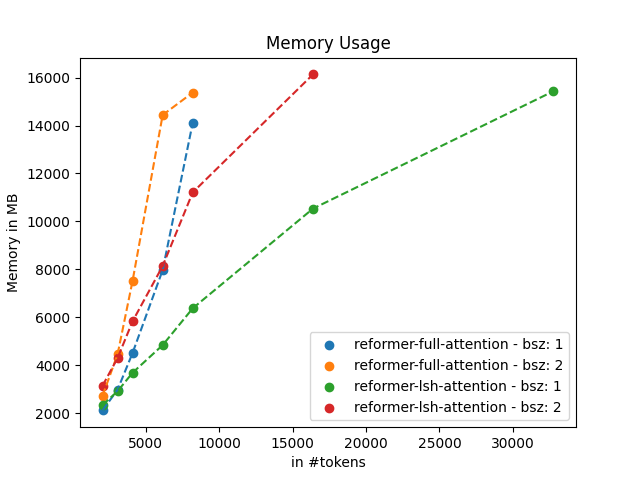

In [20]:
!python plot_csv_file.py --csv_file plots_pt/required_memory.csv --figure_png_file=plots_pt/required_memory_plot.png --no_log_scale --title='Memory Usage'

# show image
from IPython.display import Image
Image('plots_pt/required_memory_plot.png')

In [21]:
torch.cuda.empty_cache()
full_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", lsh_attn_chunk_length=32768, local_attn_chunk_length=32768, lsh_num_chunks_before=0, local_num_chunks_before=0, attn_layers=["local","local","local","local","local","local","local","local","local","local","local","local"])
benchmark_args = PyTorchBenchmarkArguments(models=["reformer-full-attention"], sequence_lengths=[2048, 3072, 4096, 6144, 8192, 16386, 32768], batch_sizes=[1], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_full_batch1.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[full_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
full_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8", lsh_attn_chunk_length=32768, local_attn_chunk_length=32768, lsh_num_chunks_before=0, local_num_chunks_before=0, attn_layers=["local","local","local","local","local","local","local","local","local","local","local","local"])
benchmark_args = PyTorchBenchmarkArguments(models=["reformer-full-attention"], sequence_lengths=[2048, 3072, 4096, 6144, 8192, 16386, 32768], batch_sizes=[4], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_full_batch2.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[full_attention_config], args=benchmark_args)
result = benchmark.run()

1 / 1
Doesn't fit on GPU. CUDA out of memory. Tried to allocate 8.00 GiB (GPU 0; 15.90 GiB total capacity; 10.88 GiB already allocated; 3.91 GiB free; 11.12 GiB reserved in total by PyTorch)
Doesn't fit on GPU. CUDA out of memory. Tried to allocate 32.00 GiB (GPU 0; 15.90 GiB total capacity; 1.69 GiB already allocated; 11.91 GiB free; 3.11 GiB reserved in total by PyTorch)

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
   reformer-full-attention           1              2048           0.191     
   reformer-full-attention           1              3072           0.324     
   reformer-full-attention           1              4096           0.513     
   reformer-full-attention           1              6144           0.9

In [22]:
torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8")
benchmark_args = PyTorchBenchmarkArguments(models=["reformer-lsh-attention"], sequence_lengths=[2048, 3072, 4096, 6144, 8192, 16386, 32768], batch_sizes=[1], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_lsh_batch1.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

torch.cuda.empty_cache()
lsh_attention_config = ReformerConfig.from_pretrained("google/reformer-enwik8")
benchmark_args = PyTorchBenchmarkArguments(models=["reformer-lsh-attention"], sequence_lengths=[2048, 3072, 4096, 6144, 8192, 16386, 32768], batch_sizes=[4], memory=False, save_to_csv=True, inference_time_csv_file="plots_pt/required_time_lsh_batch2.csv", multi_process=False)
benchmark = PyTorchBenchmark(configs=[lsh_attention_config], args=benchmark_args)
result = benchmark.run()

1 / 1

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
    reformer-lsh-attention           1              2048           0.164     
    reformer-lsh-attention           1              3072           0.224     
    reformer-lsh-attention           1              4096           0.295     
    reformer-lsh-attention           1              6144           0.433     
    reformer-lsh-attention           1              8192           0.573     
    reformer-lsh-attention           1             16386           1.198     
    reformer-lsh-attention           1             32768           2.233     
--------------------------------------------------------------------------------
Saving results to csv.
1 / 1
Doesn't fit on GPU

In [24]:
df_full_batch1 = pd.read_csv('plots_pt/required_time_full_batch1.csv')
df_full_batch2 = pd.read_csv('plots_pt/required_time_full_batch2.csv')
df_lsh_batch1 = pd.read_csv('plots_pt/required_time_lsh_batch1.csv')
df_lsh_batch2 = pd.read_csv('plots_pt/required_time_lsh_batch2.csv')
df = df_full_batch1.append(df_full_batch2).append(df_lsh_batch1).append(df_lsh_batch2)

df.to_csv('plots_pt/required_time.csv', index = False)

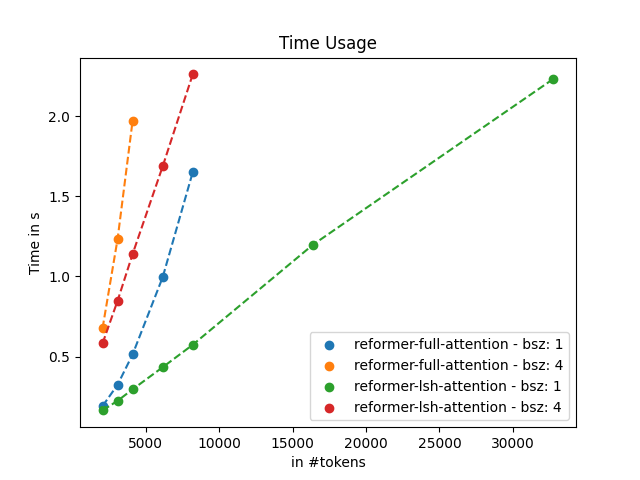

In [25]:
!python plot_csv_file.py --csv_file plots_pt/required_time.csv --figure_png_file=plots_pt/required_time_plot.png --no_log_scale --title='Time Usage' --is_time

# show image
from IPython.display import Image
Image('plots_pt/required_time_plot.png')

(480, 640, 4)


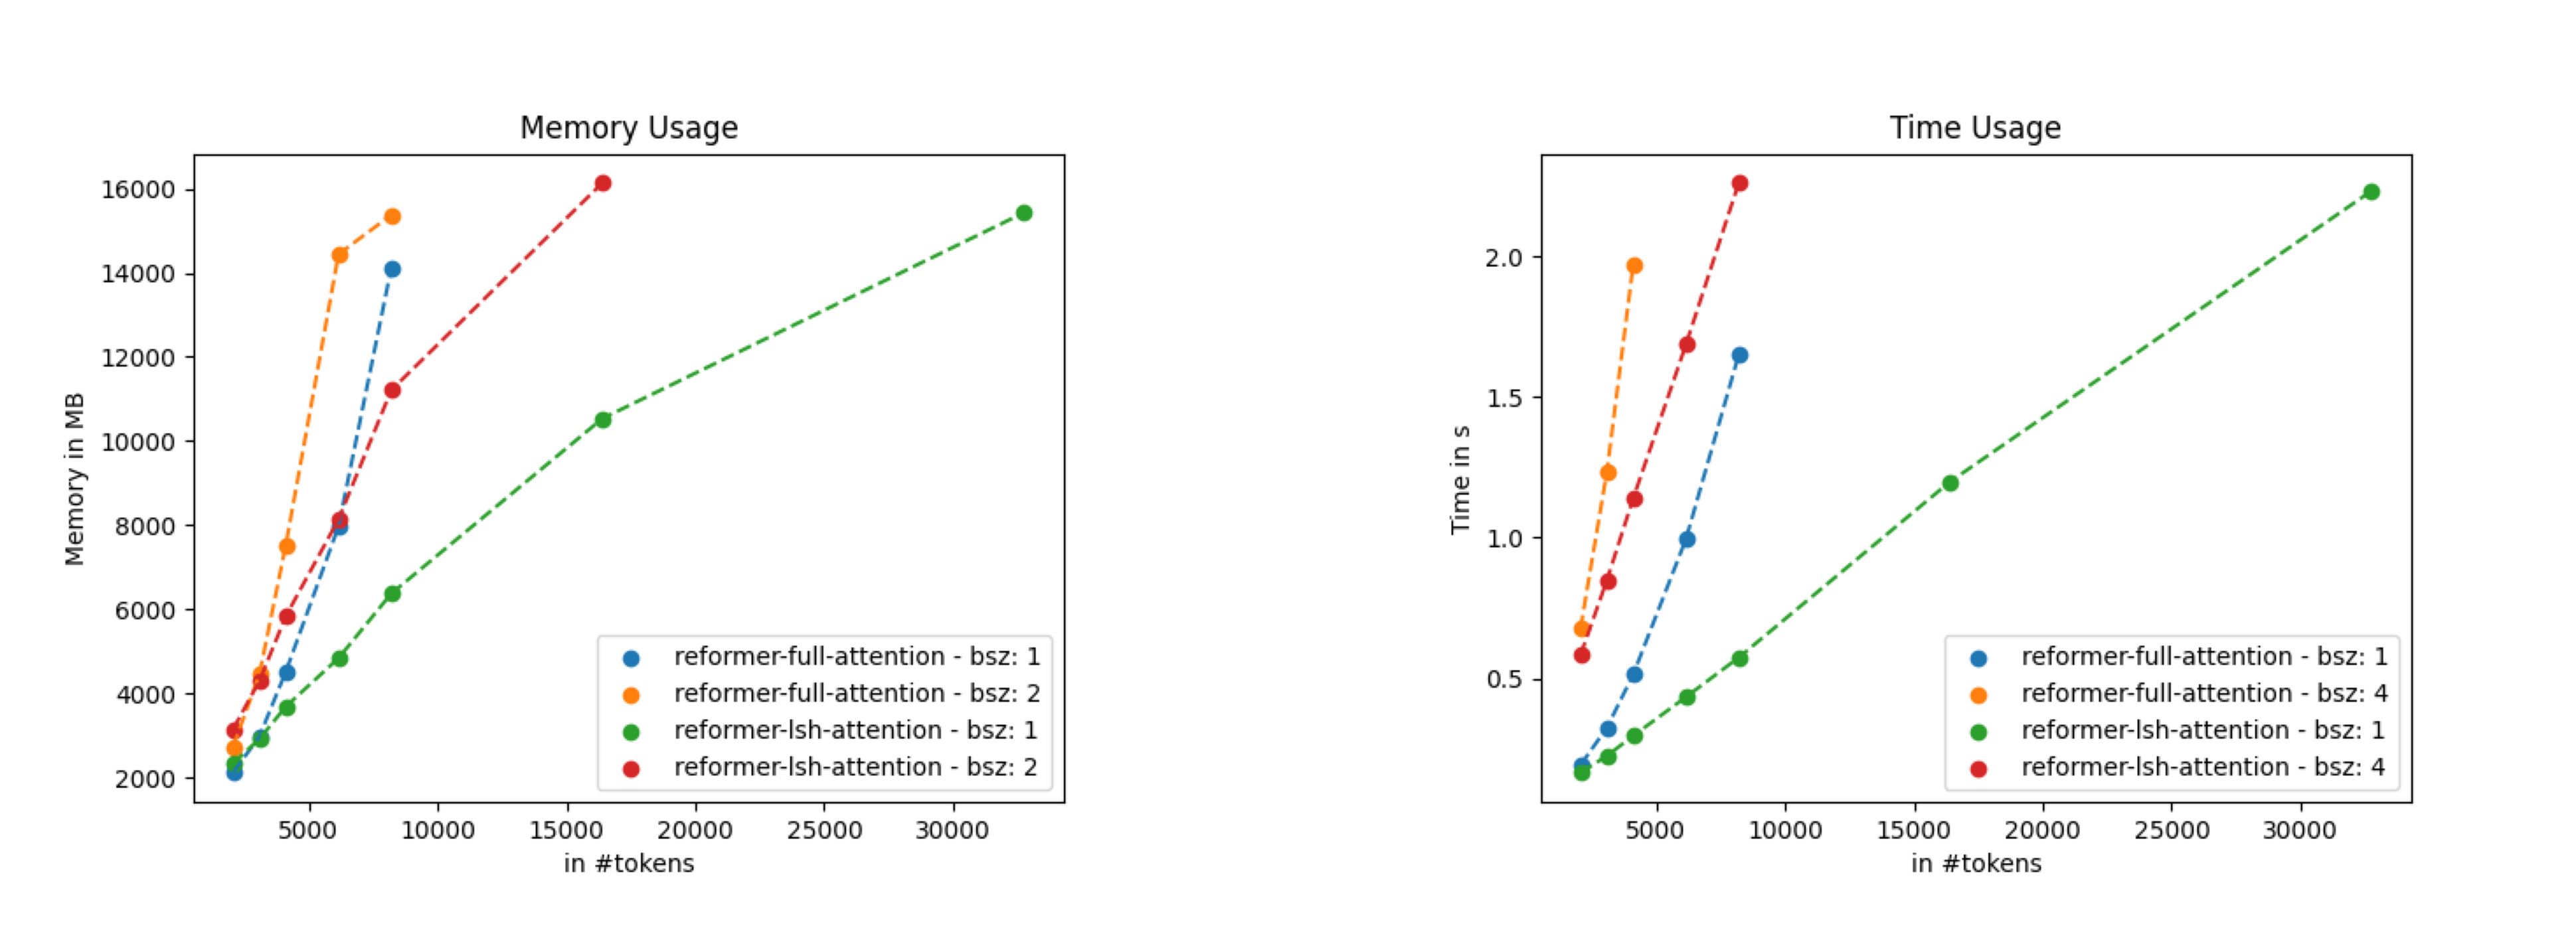

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize

required_memory_plot = mpimg.imread('plots_pt/required_memory_plot.png')
required_time_plot = mpimg.imread('plots_pt/required_time_plot.png')
print(required_memory_plot.shape)

fig, ax = plt.subplots(1, 2, figsize=(6, 3), dpi=800)
ax[0].imshow(required_memory_plot)
ax[0].axis('off')
ax[1].imshow(required_time_plot)
ax[1].axis('off')
plt.show()